# Deep learning from scratch: homework 3

## Xiaoyi Liu 3046670

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

### Import our custom deep learning library

Throughout this homework we make use of version 1.0 of our deep learning library you saw previously in class. Activate the Python cell below to import all the necessary files/libraries to complete this homework. It's good to review the description and examples in ```lib_v1_scratchpad``` before moving forward.    

In [1]:
# import custom library
from deeplearning_library_v1 import superlearn_setup
from deeplearning_library_v1 import unsuperlearn_setup

# define path to datasets
datapath = 'datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# plotting utilities
import matplotlib.pyplot as plt
from matplotlib import gridspec

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# automatically refresh if anything has changed in a backend file
%load_ext autoreload
%autoreload 2

#### <span style="color:#a50e3e;">Exercise 1. </span> Normalized gradient descent 

In this Exercise you use the *normalized gradient descent* algorithm detailed and implemented in [Section 13.3.1 of the course notes](https://jermwatt.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_3_Normalized_gradient_descent.html) to perform multiclass classification on a preprocessed subset of $10,000$ images from the [MNIST handwritten digit dataset](https://en.wikipedia.org/wiki/MNIST_database), which is located in the ```datasets``` folder and called ``mnist_contrast_normalized.csv``.

First, load in the dataset by activating the Python cell below.

In [2]:
data = np.loadtxt(datapath + 'mnist_test_contrast_normalized.csv', delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:].T

Now, create an instance of the supervised learning wrapper, called ```demo```.

In [3]:
demo = superlearn_setup.Setup(x,y)

You now choose a feature transformation scheme for this task. For this Exercise, choose a 3-layer multi-layer perceptron with ReLU activation, having $30$, $20$, and $10$ units in its first, second, and third layer, respectively. Note that the dimension of the input layer is, as always, determined by the input dimension of $x$, and that of the output layer by the number of classes in the data.   

In [4]:
# YOUR CODE GOES HERE.

# choose features
demo.choose_features(name = 'multilayer_perceptron',layer_sizes = [x.shape[0],30,20,10,10],activation = 'relu')
#demo.choose_features(name = 'multilayer_perceptron',layer_sizes = [x.shape[0],30,30,20,20,10],activation = 'relu')

Also make sure to use standard normalization along with the multiclass softmax cost to perform this Exercise.

In [5]:
# YOUR CODE GOES HERE.
# choose normalizer
demo.choose_normalizer(name = 'standard')

# choose cost
demo.choose_cost(name = 'multiclass_softmax')

Next, run normalized gradient descent for a maximum of $500$ iterations, and a fixed steplength of $10^{-1}$ by activating the Python cell below. Notice, the ```fit``` method below takes in an argument called ```version``` indicating whether we want to take normalized gradient descent steps (or not). The ```fit``` method provided for you comes without this optional argument, so you'd have to add it yourself. Additionally, you should use the *normalized gradient descent* algorithm in [Section 13.3.1 of the course notes](https://jermwatt.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_3_Normalized_gradient_descent.html) to modify the gradient descent optimizer in ```optimizers.py``` so that it accepts ```version``` as an input argument, and runs normalized gradient descent when ```version``` is set to 'normalized'.       

In [6]:
demo.fit(max_its = 500, alpha_choice = 10**(-1), version='normalized')

Finally, plot the per-iteration cost function evaluation as well as number of misclassifications by simply activating the Python cell below. 

<IPython.core.display.Javascript object>


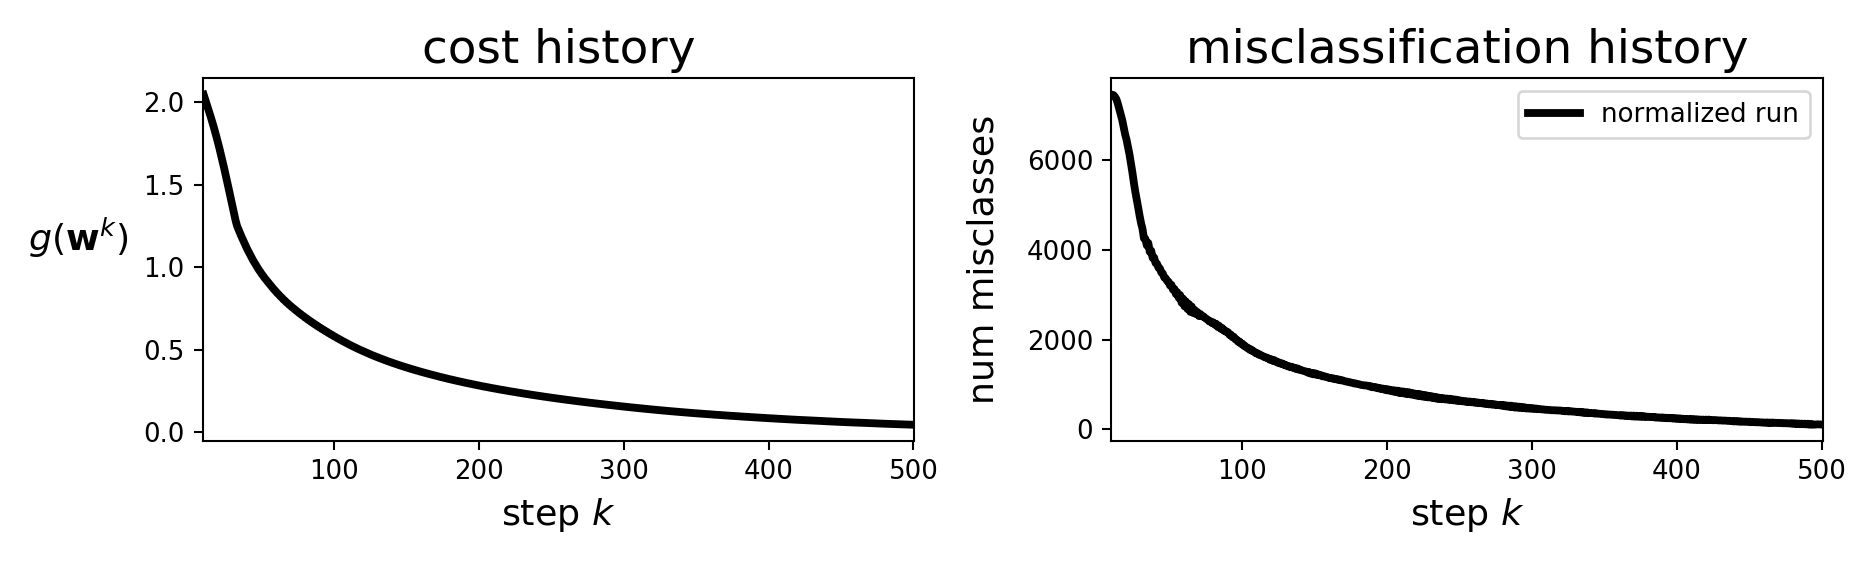

In [7]:
demo.show_histories(start = 10, labels=['normalized run'])

You should produce a figure like the one shown below.   
<figure><img src="Ex1.png"></figure>

#### <span style="color:#a50e3e;">Exercise 2. </span> Momentum trick

In this Exercise, you'll modify the gradient descent optimizer again, this time to add a new argument called ```beta``` that stores the the momentum parameter, as discussed in detail in [Section 13.4 of the course notes](https://jermwatt.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_4_Momentum_trick.html).

T complete this Exercise you should use the same dataset, network architecture, normalization scheme, cost function, steplength, and maximum iteration count as Exercise 1, run normalized gradient descent for three values of beta ($\beta=0$, $\beta=.2$, and $\beta=.9$), and plot the cost/misclassification histories.

In [8]:
demo.fit(max_its = 500, alpha_choice = 10**(-1), version='normalized', beta=0.2)

In [9]:
demo.fit(max_its = 500, alpha_choice = 10**(-1), version='normalized', beta=0.9)

<IPython.core.display.Javascript object>


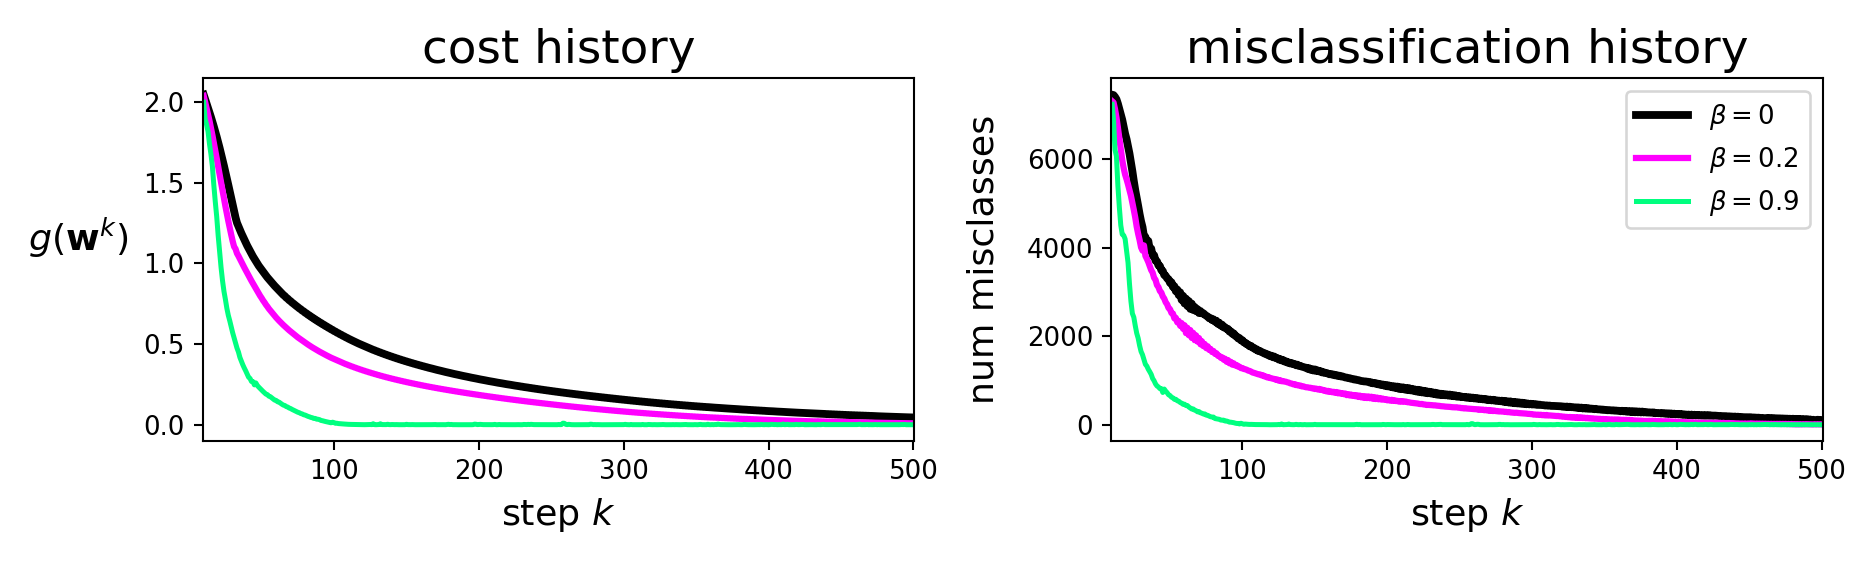

In [10]:
demo.show_histories(start = 10, labels=[r"$\beta=0$",r"$\beta=0.2$",r"$\beta=0.9$"])

You should produce a figure like the one shown below.   
<figure><img src="Ex2.png"></figure>